In [181]:
from sklearn.datasets import load_iris
data = load_iris()

In [182]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]
print(feature_names)
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

['petal length (cm)', 'petal width (cm)']


In [183]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

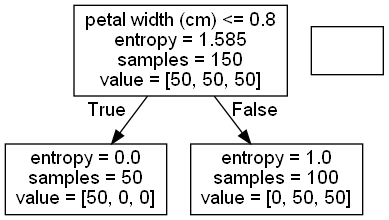

In [184]:
draw_decision_tree(tree1)

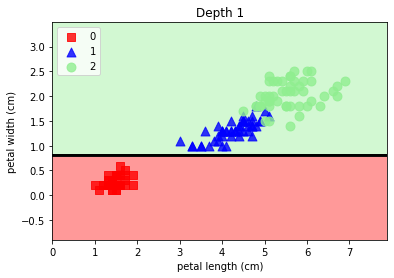

In [185]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [186]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

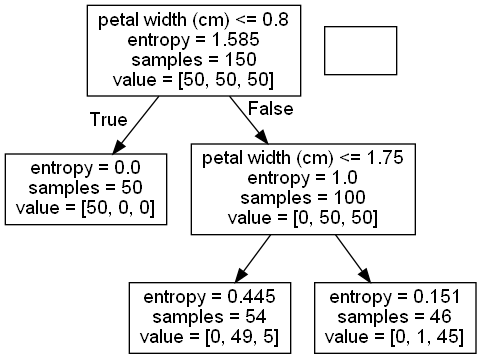

In [187]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X,y)

draw_decision_tree(tree2)

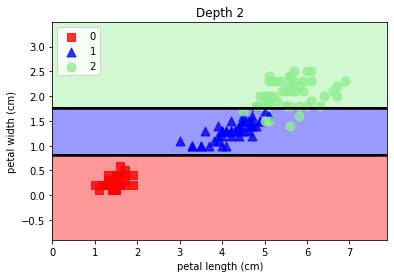

In [188]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [189]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

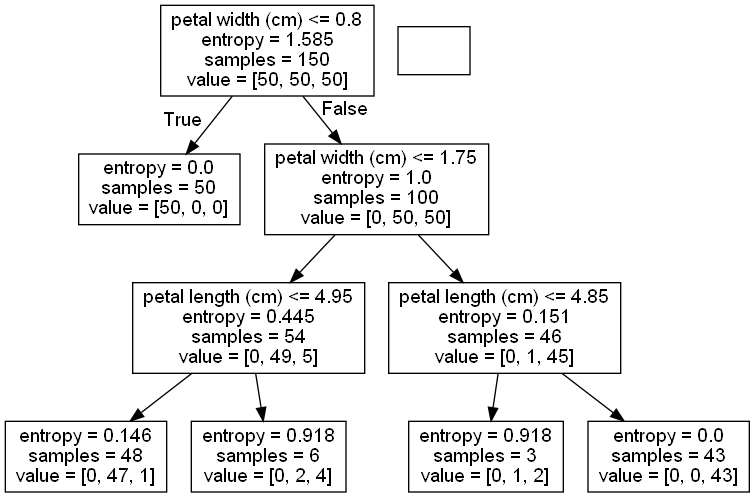

In [190]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

draw_decision_tree(tree3)

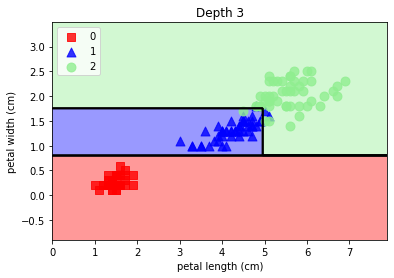

In [191]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [192]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

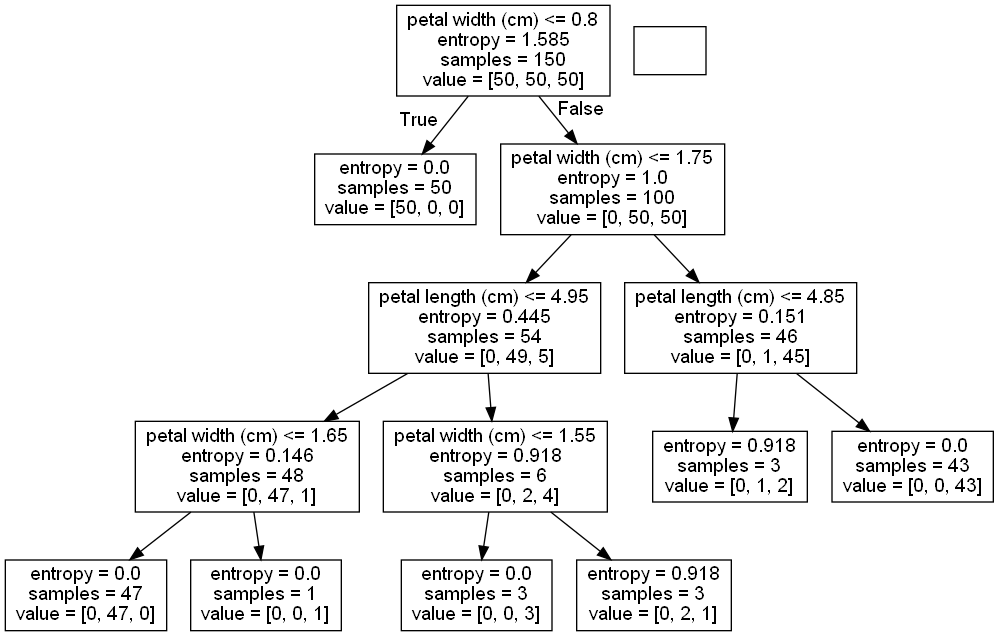

In [193]:
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

draw_decision_tree(tree4)

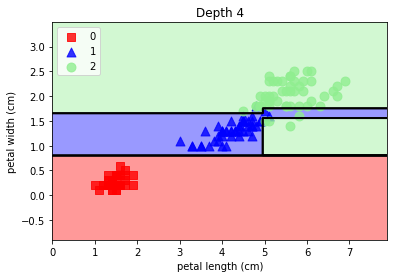

In [194]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [195]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

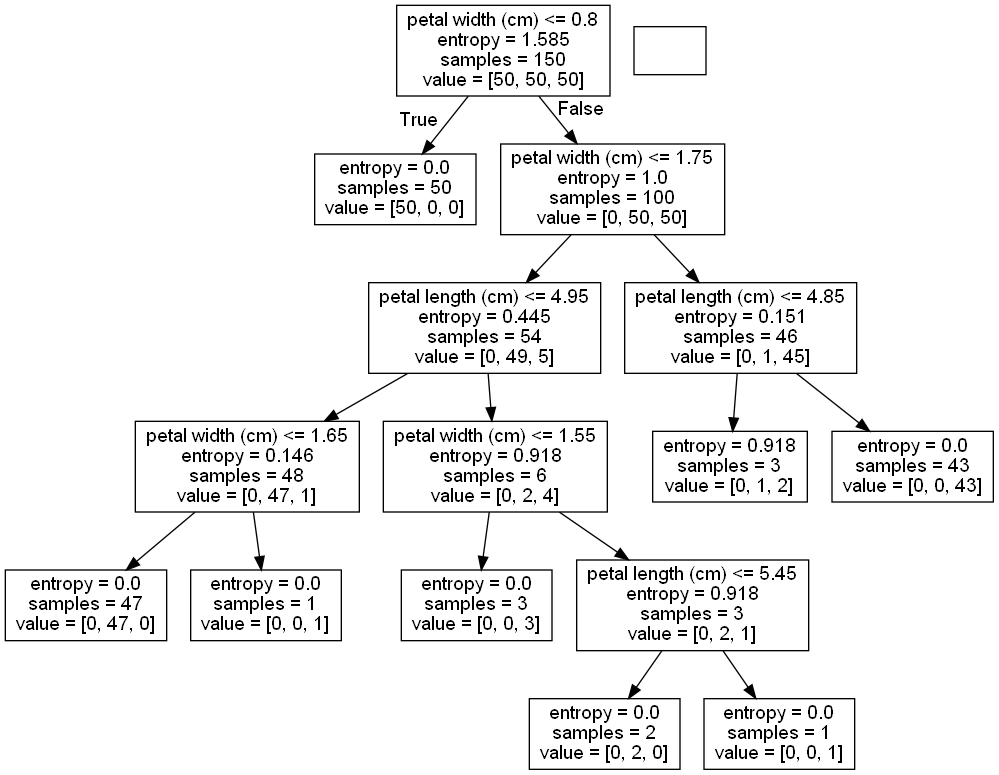

In [196]:
tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)


draw_decision_tree(tree5)

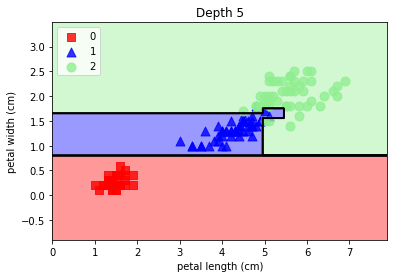

In [197]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [198]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [199]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
data = load_iris()
data.feature_names
X = data.data[:, :2]
y = data.target

model = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X,y)
y_pred = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)



0.8066666666666666

In [200]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X,y, scoring='accuracy', cv=5).mean()


0.6933333333333332

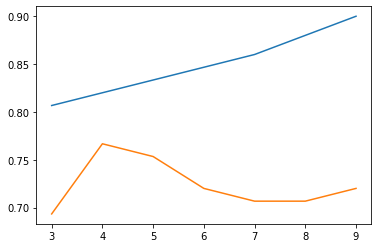

In [201]:
mean_test_accuracy = []
train_accuracy = []

for max_depth in range(3, 10):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth).fit(X,y)
    train_accuracy.append(accuracy_score(y, model.predict(X)))
    mean_test_accuracy.append(cross_val_score(model, X,y, scoring='accuracy', cv=5).mean())

plt.plot(np.arange(3,10), train_accuracy)
plt.plot(np.arange(3,10), mean_test_accuracy)
plt.show()

In [202]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [203]:
feature_names = ['pclass', 'age','sex']
X = df[feature_names].copy()
y = df['survived'].copy()
X.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [204]:
from sklearn.preprocessing import LabelEncoder
X['sex'] = LabelEncoder().fit_transform(X['sex'])
print(X.tail())

     pclass   age  sex
886       2  27.0    1
887       1  19.0    0
888       3   NaN    0
889       1  26.0    1
890       3  32.0    1


In [205]:
X['age'].fillna(X['age'].mean(), inplace=True)

X.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [206]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
X2 = pd.DataFrame(LabelBinarizer().fit_transform(X['pclass']), columns=['c1','c2','c3'], index=X.index)

X = pd.concat([X,X2], axis=1)

del(X['pclass'])
X.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


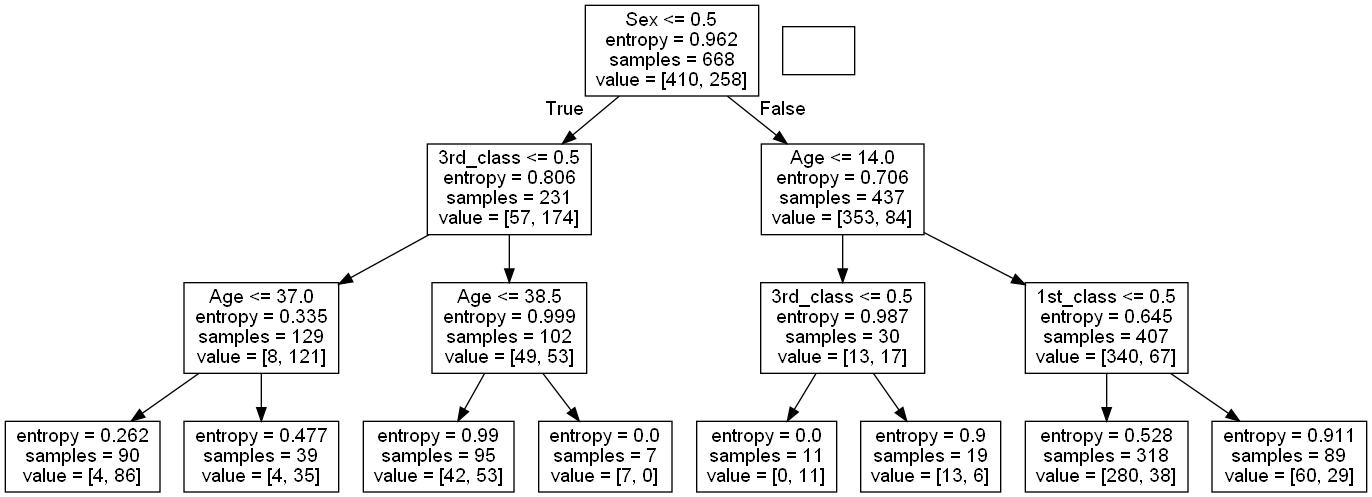

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train,y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=['Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)


In [214]:
confusion_matrix(y_train, model.predict(X_train))


array([[360,  50],
       [ 73, 185]], dtype=int64)

In [216]:
confusion_matrix(y_test, model.predict(X_test))



array([[119,  20],
       [ 25,  59]], dtype=int64)

In [217]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



In [223]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X,y)
print(model)

cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()


DecisionTreeClassifier()


0.9226207110697097

[Text(0.5, 0.8333333333333334, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.25, 0.5, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'X[1] <= 16.11\ngini = 0.109\nsamples = 190\nvalue = [179, 11]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

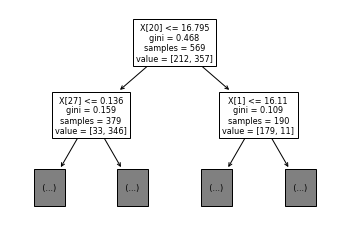

In [224]:
from sklearn.tree import plot_tree
plot_tree(model, max_depth=1)